# Probabilistic Graphical Models using Python

## Introduction

**Probabilistic Graphical Model (PGM)** is a technique of representing Joint Distributions over random variables in a compact way by exploiting the dependencies between them. PGMs use a network structure to encode the relationships between the random variables and some parameters to represent the joint distribution.

There are two major types of Graphical Models: **Bayesian Networks** and **Markov Networks**.

**Bayesian Network**: A Bayesian Network consists of a directed graph and a conditional probability distribution associated with each of the random variables. A Bayesian network is used mostly when there is a causal relationship between the random variables.

**Markov Network**: A Markov Network consists of an undirected graph and a few Factors are associated with it. Unlike Conditional Probability Distributions, a Factor does not rep- resent the probabilities of variables in the network; instead it represents the compatibility between random variables that is how much a particular state of a random variable likely to agree with the another state of some other random variable.

There are numerous open source packages available in Python for working with graphical models. eBay’s bayesian-belief-networks [bbn](https://github.com/ eBay/bayesian- belief- networks) mostly focuses on Bayesian Models and has implementation of a limited number of inference algorithms. Another package pymc [pymc](https://pymc- devs.github.io/pymc/) focuses mainly on Markov Chain Monte Carlo (MCMC) method. libpgm [libpgm](https://github.com/CyberPoint/libpgm http://bigbird.comp.nus.edu.sg/pmwiki/farm/appl/index. php?n=Main.PomdpXDocumentation) also mainly focuses on Bayesian Networks.

pgmpy [pgmpy](https://github.com/pgmpy/pgmpy) is a python library for working with graphical models. It allows the user to create their own graphical models and answer inference or map queries over them. pgmpy has implementation of many inference algorithms like VariableElimination, Belief Propagation etc.


## Creating Bayesian Models using pgmpy

A Bayesian Network consists of a directed graph where nodes represents random variables and edges represent the the relation between them. It is parameterized using Conditional Probability Distributions(CPD). Each random variable in a Bayesian Network has a CPD associated with it. If a random varible has parents in the network then the CPD represents $P(var|Parvar)$ i.e. the probability of that variable given its parents. In the case, when the random variable has no parents it simply represents $P(var)$ i.e. the probability of that variable.

In [1]:
from pgmpy.models import BayesianModel

student_model = BayesianModel([('D', 'G'),
                               ('I', 'G'),
                               ('G', 'L'),
                               ('I', 'S')])

In [2]:
from pgmpy.factors.discrete import TabularCPD

grade_cpd = TabularCPD(
    variable='G',
    variable_card=3,
    values=[[0.3, 0.05, 0.9, 0.5],
            [0.4, 0.25, 0.08, 0.3],
            [0.3, 0.7, 0.02, 0.2]],
    evidence=['I', 'D'],
    evidence_card=[2, 2])

In [3]:
difficulty_cpd = TabularCPD(
    variable='D',
    variable_card=2,
    values=[[0.6, 0.4]])

In [4]:
intel_cpd = TabularCPD(
    variable='I',
    variable_card=2,
    values=[[0.7, 0.3]])

In [5]:
letter_cpd = TabularCPD(
    variable='L',
    variable_card=2,
    values=[[0.1, 0.4, 0.99],
            [0.9, 0.6, 0.01]],
    evidence=['G'],
    evidence_card=[3])

In [6]:
sat_cpd = TabularCPD(
    variable='S',
    variable_card=2,
    values=[[0.95, 0.2],
            [0.05, 0.8]],
    evidence=['I'],
    evidence_card=[2])

In [7]:
student_model.add_cpds(grade_cpd, difficulty_cpd,
                       intel_cpd, letter_cpd,
                       sat_cpd)

In [8]:
from pgmpy.inference import VariableElimination 

student_infer = VariableElimination(student_model) 
prob_G = student_infer.query(variables=['G']) 
print(prob_G['G'])

╒═════╤══════════╕
│ G   │   phi(G) │
╞═════╪══════════╡
│ G_0 │   0.3620 │
├─────┼──────────┤
│ G_1 │   0.2884 │
├─────┼──────────┤
│ G_2 │   0.3496 │
╘═════╧══════════╛


In [9]:
student_infer.map_query(variables='G')

{'G': 2}

In [10]:
from pgmpy.models import BayesianModel 
import pandas as pd
import numpy as np


# Considering that each variable have only 2 states, 
# we can generate some random data.

raw_data = np.random.randint(low=0, high=2, size=(1000, 5))
data = pd.DataFrame(raw_data, columns=['D', 'I', 'G', 'L', 'S'])

data_train = data[: int(data.shape[0] * 0.75)]

student_model = BayesianModel([('D', 'G'),
                               ('I', 'G'),
                               ('I', 'S'),
                               ('G', 'L')])

student_model.fit(data_train)

student_model.get_cpds()

[<TabularCPD representing P(D:2) at 0x1040f8630>,
 <TabularCPD representing P(G:2 | D:2, I:2) at 0x113564e10>,
 <TabularCPD representing P(I:2) at 0x1135843c8>,
 <TabularCPD representing P(L:2 | G:2) at 0x1135840f0>,
 <TabularCPD representing P(S:2 | I:2) at 0x113584ac8>]

In [11]:
student_model.size()

4

In [12]:
data_test = data[int(data.shape[0] * 0.75) : data.shape[0]]
data_test.drop('L', axis=1, inplace=True)

student_model.predict(data_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,L
750,0
751,0
752,0
753,0
754,0
755,0
756,0
757,0
758,0
759,0


In [13]:
import matplotlib.pyplot as plt
import networkx as nx

nx.draw(student_model)

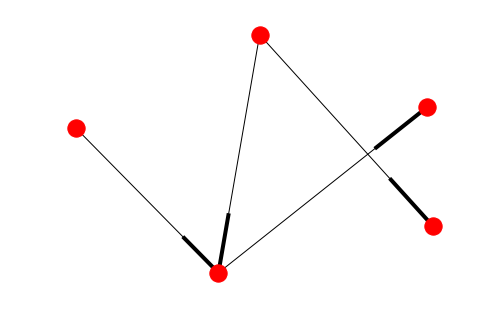

In [14]:
plt.show()

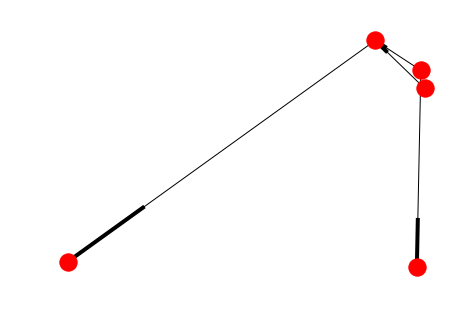

In [16]:
nx.draw_random(student_model)
plt.show()

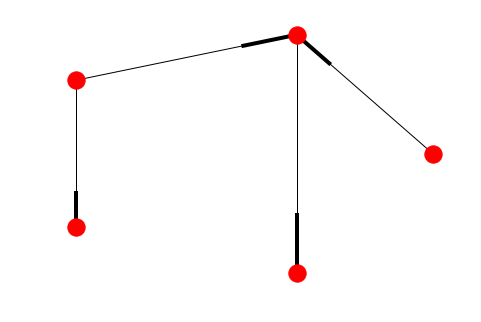

In [17]:
nx.draw_circular(student_model)
plt.show()

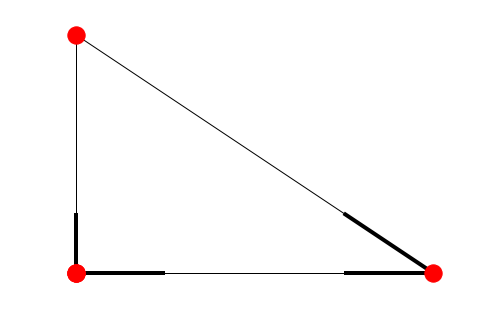

In [18]:
nx.draw_spectral(student_model)
plt.show()